
# __Springboard Relax Take Home Challenge__

##### _Ben Takacs_
###### __Python version 3.10.4__


### __Imports__


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



### __Load Data__


In [50]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1', sep=',',)
useng = pd.read_csv('takehome_user_engagement.csv', sep=',')

In [51]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [52]:
useng

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [53]:
# Set indices
users.set_index('object_id', inplace=True)
users.index.name = 'user_id'
useng['time_stamp'] = pd.to_datetime(useng['time_stamp'])
# useng.set_index('time_stamp', inplace=True)

last_session_creation_time


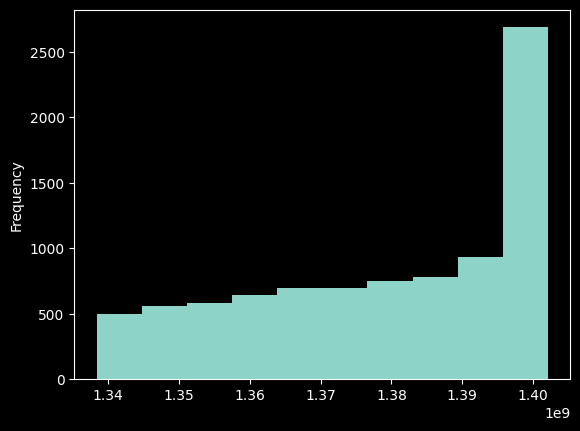

opted_in_to_mailing_list


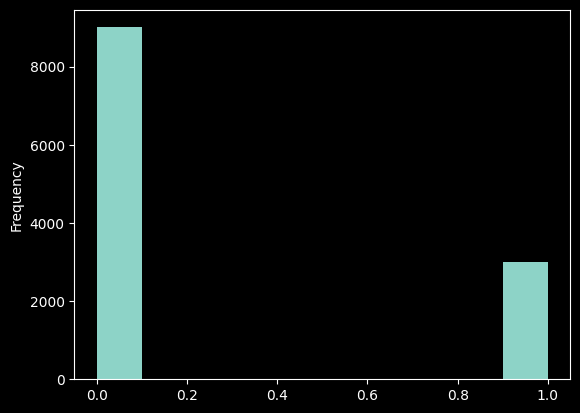

enabled_for_marketing_drip


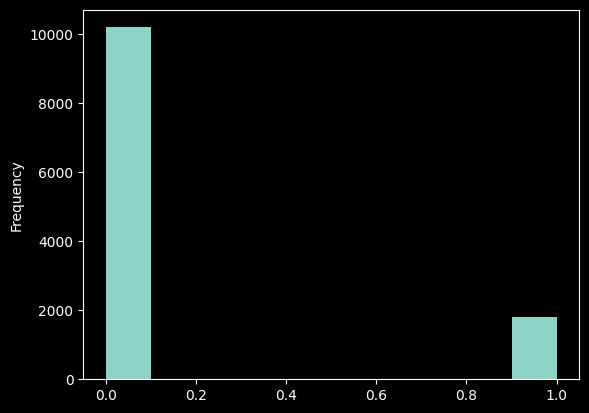

org_id


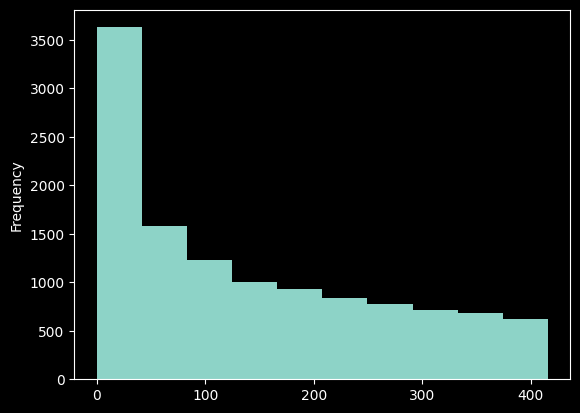

invited_by_user_id


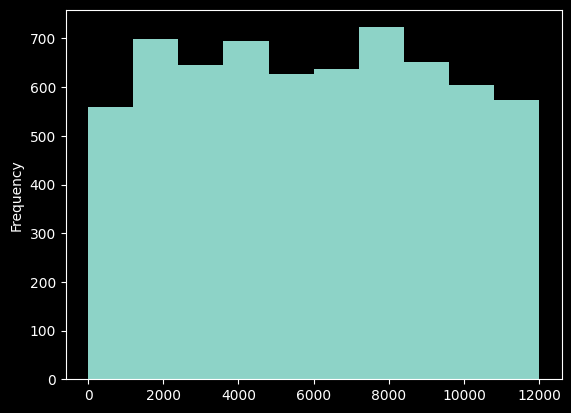

In [61]:
plt.figure()

for col in users.drop(columns=['creation_time', 'name', 'email', 'creation_source']).columns:
        print(col)
        users[col].plot(kind='hist')
        plt.show()

plt.show()

In [64]:
users.dtypes

creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [65]:
# Correct dtypes
users.creation_time = pd.to_datetime(users.creation_time)
users.last_session_creation_time = pd.to_datetime(users.last_session_creation_time, unit='s')
users.invited_by_user_id = users.invited_by_user_id.astype('Int64')

users.dtypes

creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                     Int64
dtype: object

In [8]:
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240
...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,<NA>
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074


In [9]:
useng.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

No null values in user engagement data, so we can continue with identifying adopted users.

In [10]:
# Identify "adopted" users
from datetime import timedelta

# Function goes through each user and checks if there are 2 login dates (with 1 in the middle) within 7 days
def adopted_user(dates):
    dates = sorted(dates)
    for i in range(len(dates) - 3): # only taking first and last login date
        if dates[i+2] - dates[i] <= timedelta(days=7): # 7 days inclusive
            return 1
    return 0
    
# apply function to login dates of each user
adopted = useng.groupby('user_id')['time_stamp'].apply(adopted_user)

In [11]:
adopted.value_counts()

time_stamp
0    7217
1    1606
Name: count, dtype: int64

1600 adopted users out of a total of 8800 users, not 12000

### __Clean Null Values__

In [12]:
# Check for null values
users.isnull().sum()

creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

3000 users don't have a last session creation time, so likely created an account but never loggged in.

In [13]:
users.invited_by_user_id.value_counts()

invited_by_user_id
10741    13
2527     12
1525     11
11770    11
2308     11
         ..
1390      1
5445      1
8526      1
4695      1
5450      1
Name: count, Length: 2564, dtype: Int64

In [14]:
users.invited_by_user_id.value_counts().median()

2.0

In [15]:
users[users.creation_time == users.last_session_creation_time]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
13,2014-03-30 16:19:38,Fry Alexander,AlexanderDFry@cuvox.de,ORG_INVITE,2014-03-30 16:19:38,0,0,254,11204
21,2013-01-22 12:27:42,Hunter Alfie,AlfieHunter@gmail.com,PERSONAL_PROJECTS,2013-01-22 12:27:42,0,0,54,<NA>
22,2014-02-10 06:00:46,Myers Jordan,JordanMyers@gmail.com,ORG_INVITE,2014-02-10 06:00:46,0,0,7,2994
...,...,...,...,...,...,...,...,...,...
11984,2014-02-11 21:26:11,Reed Cerys,CerysReed@yahoo.com,SIGNUP,2014-02-11 21:26:11,0,0,170,<NA>
11987,2013-03-15 03:21:01,Reed Poppy,ftdkorrj@uyhoy.com,SIGNUP,2013-03-15 03:21:01,0,0,1,<NA>
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263


In [16]:
users[users.last_session_creation_time.isnull() & users.invited_by_user_id.isnull()]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,<NA>
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,<NA>
15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,<NA>
16,2013-02-11 10:09:50,Engel René,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,<NA>
32,2013-04-17 16:21:30,Perez Timothy,TimothyJPerez@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,98,<NA>
...,...,...,...,...,...,...,...,...,...
11973,2012-10-30 03:09:47,Simmons Thomas,ThomasSimmons@gmail.com,PERSONAL_PROJECTS,NaT,0,0,52,<NA>
11976,2013-12-25 22:01:41,Kohl Leah,LeahKohl@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,248,<NA>
11978,2014-04-23 16:28:06,Castro Pedro,PedroCunhaCastro@gustr.com,PERSONAL_PROJECTS,NaT,1,0,29,<NA>


In [17]:
users[users.last_session_creation_time.isnull() | users.invited_by_user_id.isnull()]

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,<NA>
8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,<NA>
9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,<NA>
11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,<NA>
12,2014-04-17 23:48:38,Mathiesen Lærke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270
...,...,...,...,...,...,...,...,...,...
11994,2012-06-05 04:46:16,Grimstone Joel,conxzghp@eaouk.com,GUEST_INVITE,NaT,0,0,84,5450
11995,2013-10-21 13:33:17,Werfel Sebastian,SebastianWerfel@gmail.com,PERSONAL_PROJECTS,2013-10-22 13:33:17,0,0,0,<NA>
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,<NA>


Most invited by user only has 13 invites, and median is 2, so most inviters are unique or invited 2 people. Most likely not a good indicator for a  model.
There are 3000 users (1/4) who created an account and never logged in again (one login). This could be a big enough sample size to fill in missing values.
There are 1500 rows of overlap with a missing last session id and invited by user id.  
7000 total rows with a missing value.

For now, I'll drop the invited by user id column and fill missing last sessions with creation time.
We can also do some feature engineering, and create an account history length.

In [18]:
users.drop(columns=['invited_by_user_id'], inplace=True)
users.fillna({'last_session_creation_time':users.creation_time}, inplace=True)
users.isnull().sum()
# users

creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

In [19]:
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
user_id,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193
...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83


Lost about a quarter of the data.

In [29]:
# Create account history length in days
users['account_age'] = (users.last_session_creation_time - users.creation_time).dt.days
users.account_age

user_id
1          0
2        136
3          0
4          1
5          5
        ... 
11996      0
11997      5
11998      0
11999      2
12000      0
Name: account_age, Length: 8823, dtype: int64


### Identify 'adopted users'


In [30]:
users.merge(adopted, how='inner', on='user_id').rename(columns={'time_stamp':'adopted'}, inplace=True)
users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,account_age
user_id,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,0,0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,1,136
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,0,0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,0,5
...,...,...,...,...,...,...,...,...,...,...
11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,0,0
11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,0,5
11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,0,0


### __Modeling__

In [31]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix

For modeling we will drop name and email, as they're unique to each user and not important to modeling.

In [32]:
# Split x and y

x = users.drop(columns=['adopted', 'name', 'email']) # drop target feature and features that make up adopted user
x.creation_time = x.creation_time.astype('int64') # convert times to unix time
x.last_session_creation_time = x.last_session_creation_time.astype('int64')
y = users.adopted

# Split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.75, random_state=69, stratify=y)

# Select categorical and numerical columns
cat_feat = x.select_dtypes(include=['object']).columns
num_feat = x.select_dtypes(include=['int64', 'float64']).columns

# check
print(cat_feat)

# Create preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_feat),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feat)
])

# Create classifier object
rf = RandomForestClassifier(random_state=69)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Create param grid
param_grid = {
    "classifier__n_estimators": [100, 200, 500],
    "classifier__max_depth": [10, 20, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__bootstrap": [True, False]
}

# Use random search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=20, cv=5, scoring="accuracy", n_jobs=-1, verbose=1, random_state=69)
model = random_search.fit(xtrain, ytrain)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)

# Evaluate on test set
ypred = random_search.best_estimator_.predict(xtest)
ypred_prob = random_search.best_estimator_.predict_proba(xtest)
print("Test Accuracy:", accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Index(['creation_source'], dtype='object')
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_depth': None, 'classifier__bootstrap': True}
Best CV Accuracy: 0.9691704745006428
Test Accuracy: 0.9646418857660924
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1804
           1       0.94      0.87      0.90       402

    accuracy                           0.96      2206
   macro avg       0.95      0.93      0.94      2206
weighted avg       0.96      0.96      0.96      2206



<Figure size 640x480 with 0 Axes>

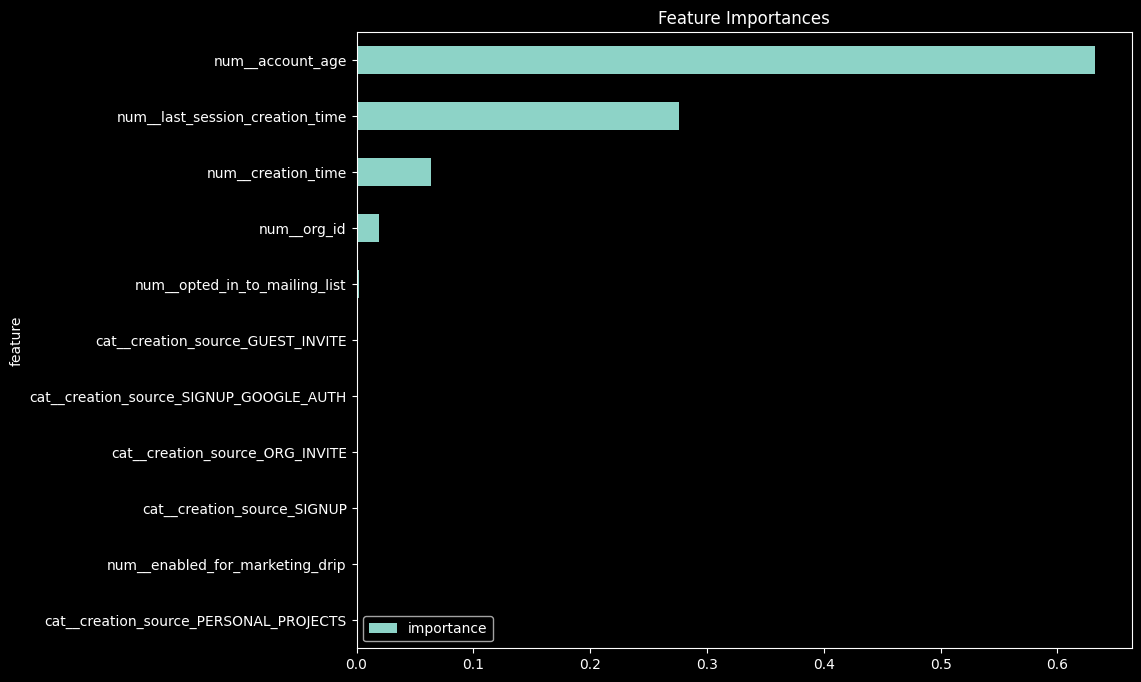

In [33]:
# Get feature names from pre processor
feat_imp = model.best_estimator_.named_steps['classifier'].feature_importances_

fimpdf = pd.DataFrame({'feature':model.best_estimator_.named_steps['preprocessor'].get_feature_names_out(input_features=xtrain.columns), 'importance':feat_imp}).sort_values(by='importance', ascending=True)

plt.figure()
fimpdf.plot(kind='barh', x='feature', y='importance', title='Feature Importances', figsize=(10, 8))
plt.show()

In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

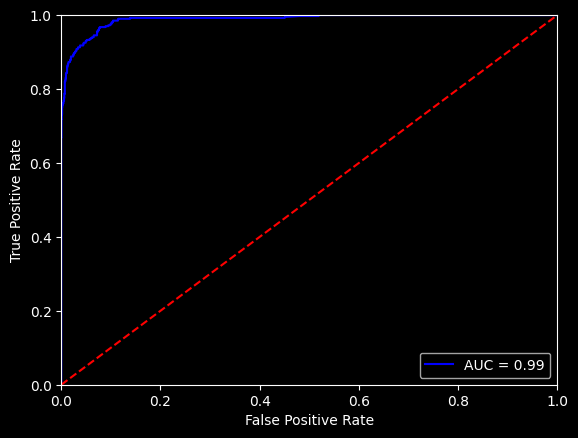

In [35]:
fpr, tpr, threshold = roc_curve(ytest, ypred_prob[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

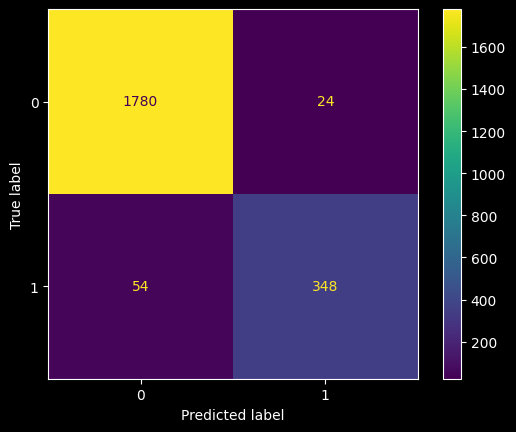

In [36]:
cm = confusion_matrix(ytest, ypred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()


## __Summary__

#### The Data

The data given were a table of 12000 users with information on account creation and last login in, as well as a table with which user logged in when.  
From this data we were able to see that about a quarter of users created an account but never logged in, and most user inviters invited one or two other users. 

We're able to create a very accurate model that predicts whether users will be adopted or not. The most important feature for this model is the engineered feature, account age in days. 